Análise Exploratória de Dados (EDA) Vendas de Videogames

1. Baixando o conjunto de dados: 

In [ ]:
# Downloading the dataset
import opendatasets as od

dataset_url = 'https://www.kaggle.com/gregorut/videogamesales' 
od.download(dataset_url)

# Provide personal kaggle username and API key

# Extract the downloaded dataset
import os

data_dir = './videogamesales'
os.listdir(data_dir)

2. Preparação e limpeza de dados

In [5]:
#Data Preparation and Cleaning

import pandas as pd

df = pd.read_csv("./videogamesales/vgsales.csv")
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [6]:
#Panda's `.info()` method will give us information on the dataframe's column names, index dtype and non-null values.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [7]:
# Find columns with missing values
missing_val_count_by_column = (df.isnull().sum())
missing_val_count_by_column[missing_val_count_by_column > 0]

Year         271
Publisher     58
dtype: int64

In [28]:
# Drop NaN values in Publisher column
df.dropna(subset=["Publisher"], inplace=True) 

In [29]:
# Fill missing cells with column median
df["Year"].fillna((df["Year"].median()), inplace=True)

3. Análise e Visualização Exploratória

In [12]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("darkgrid")

In [13]:
# Análise estatística

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rank,16540.0,8294.197642,4790.703200,1.00,4143.75,8292.50,12440.25,16600.00
Year,16540.0,2006.414510,5.788794,1980.00,2003.00,2007.00,2010.00,2020.00
NA_Sales,16540.0,0.265079,0.817929,0.00,0.00,0.08,0.24,41.49
EU_Sales,16540.0,0.146883,0.506129,0.00,0.00,0.02,0.11,29.02
JP_Sales,16540.0,0.077998,0.309800,0.00,0.00,0.00,0.04,10.22
Other_Sales,16540.0,0.048191,0.188879,0.00,0.00,0.01,0.04,10.57
Global_Sales,16540.0,0.538426,1.557424,0.01,0.06,0.17,0.48,82.74


Usando o método .describe(), podemos realizar análises estatísticas nas colunas numéricas de nossos dados e reunir os seguintes fatos:

estamos trabalhando com dados de vendas de videogames feitos de 1980 a 2020
a média de vendas globais de um jogo é de US $ 538.426
A América do Norte tem a maior média de vendas por jogo em comparação com outras regiões
o maior valor de vendas já feito em um jogo totalizou US $ 82,74 milhões globalmente

A partir do gráfico de dispersão a seguir, podemos ver que a maioria dos títulos de jogos fez vendas globais abaixo da marca de cerca de US $ 15 milhões, com alguns excepcionalmente bons indo além disso. Nós até notamos alguns valores atípicos, com um jogo em particular lançado em 2006 fazendo um avanço.

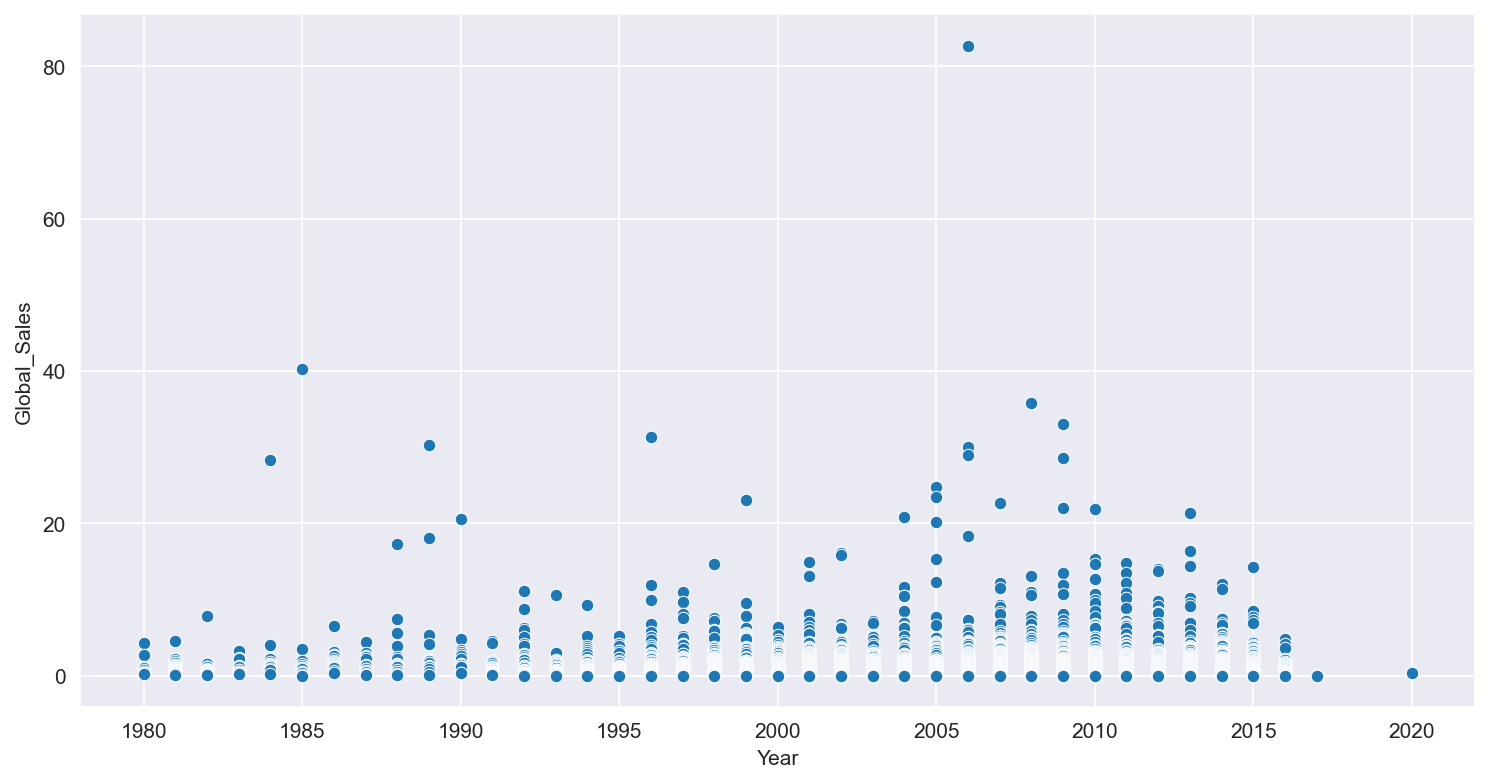

In [14]:
# Explorando a relação entre Vendas Anuais e Globais

plt.figure(figsize=(12,6), dpi=150)
sns.scatterplot(data=df,
                x="Year",
                y="Global_Sales")

plt.show()

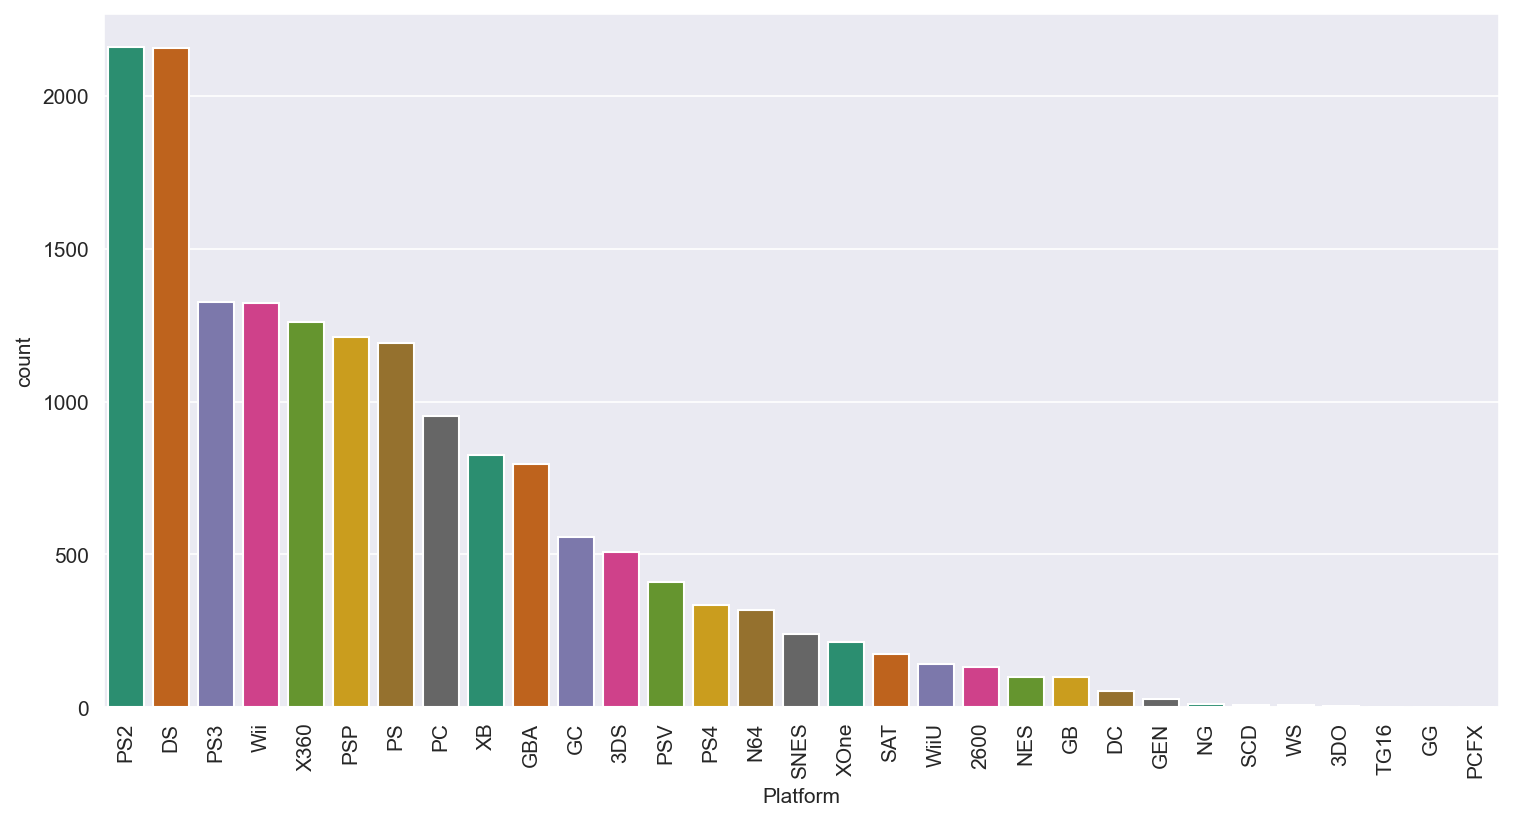

In [15]:
# Contagem Total de Jogos para cada Plataforma

plt.figure(figsize=(12,6), dpi=150)
sns.countplot(data=df,
              x="Platform",
              order = df["Platform"].value_counts().index,
              palette="Dark2")
plt.xticks(rotation=90)
plt.show()

PlayStation 2 e Nintendo DS têm o maior número de títulos de jogos em sua plataforma. Na verdade, eles são quase iguais em contagem.

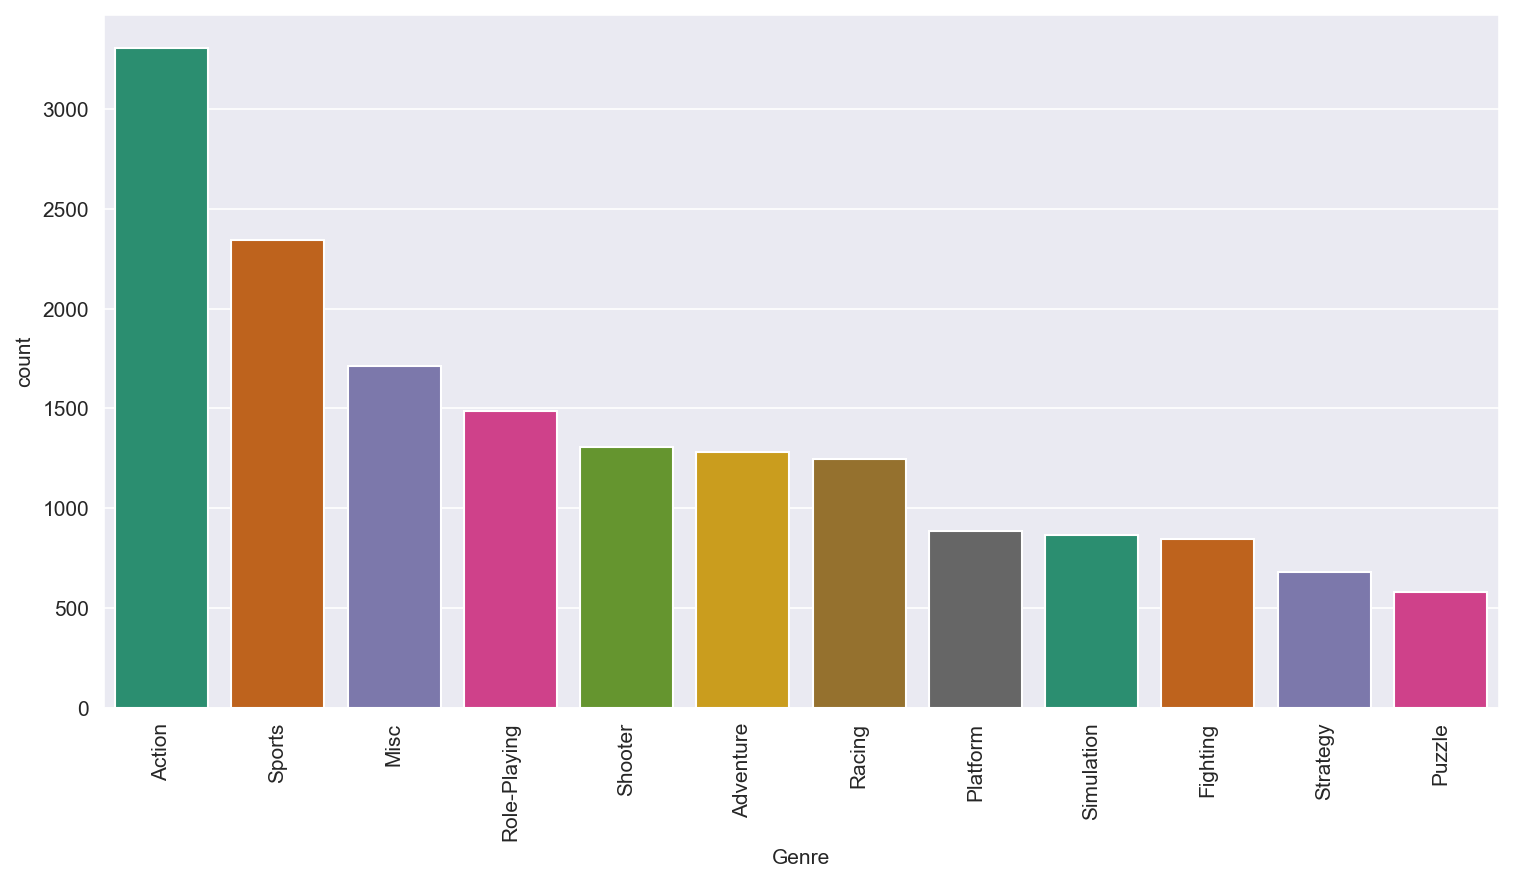

In [16]:
#Contagem Total de Jogos para cada Gênero

plt.figure(figsize=(12,6), dpi=150)
sns.countplot(data=df,
              x="Genre",
              order = df["Genre"].value_counts().index,
              palette="Dark2")
plt.xticks(rotation=90)
plt.show()

Action é o gênero onde a maioria dos títulos de jogos pode ser encontrada, com Sports, Misc e Role-Playing seguindo não muito atrás. Puzzle parece ser o menos popular entre os desenvolvedores de jogos.

C:\Users\julia\AppData\Local\Temp\ipykernel_5536\2488429354.py:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(encoded_df.corr(),


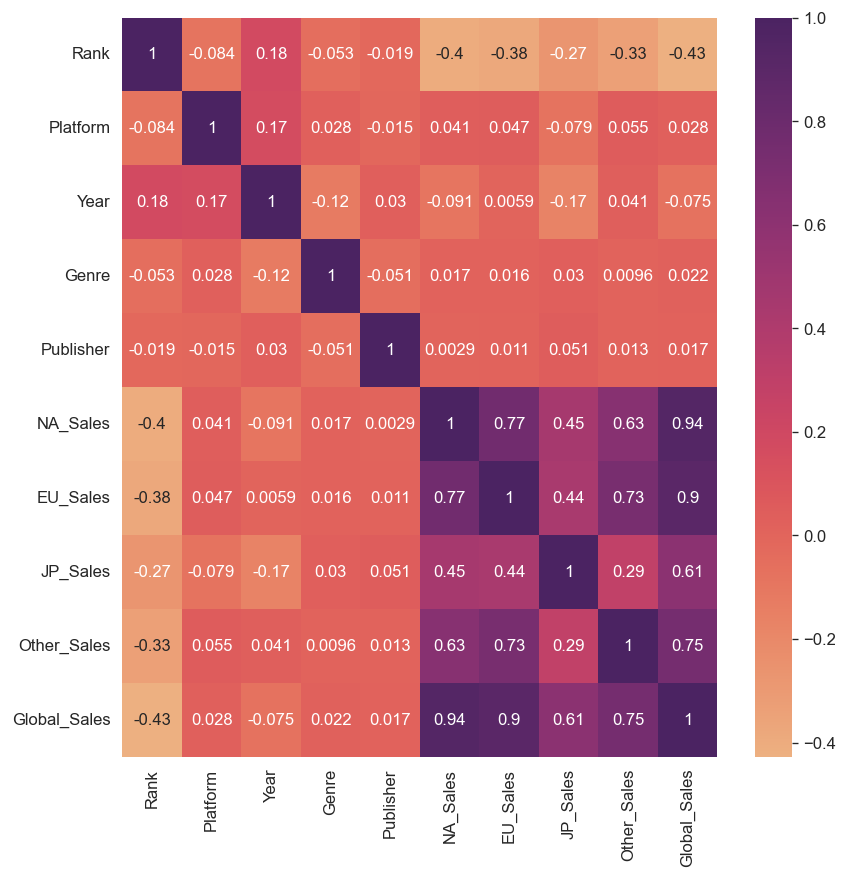

In [25]:
# Explorando a correlação entre os recursos

from sklearn.preprocessing import LabelEncoder

# Encode selected categorical columns to prepare for heatmap plotting
encoded_df = df.copy()
categ = ["Platform", "Genre", "Publisher"]
encoder = LabelEncoder()
encoded_df[categ] = encoded_df[categ].apply(encoder.fit_transform)

# Create correlation heatmap
plt.figure(figsize=(8, 8), dpi=120)
sns.heatmap(encoded_df.corr(), 
            cmap="flare",
            annot=True)

plt.show()

Quais são os 10 melhores jogos que mais são vendidos globalmente?

In [20]:
# Using the `.nlargest()` method, we can easily extract the top n values of a dataframe
df.nlargest(10, "Global_Sales")

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


Quais são os 5 principais gêneros de jogos que estão fazendo altas vendas?

In [21]:
# We will the `.groupby()`method to consolidate the indivisual genre, and the `.agg()` method to perform the sum function
sales_genre = df.groupby("Genre").agg({"Global_Sales": pd.Series.sum})
sales_genre.nlargest(5, "Global_Sales")

,Global_Sales
Genre,
Action,1750.33
Sports,1329.35
Shooter,1037.32
Role-Playing,927.31
Platform,830.87


Qual jogo fez mais vendas por região e globalmente?


In [27]:
print(f"NA: {df.nlargest(1, 'NA_Sales').values[0,1]}")
print(f"EU: {df.nlargest(1, 'EU_Sales').values[0,1]}")
print(f"JP: {df.nlargest(1, 'JP_Sales').values[0,1]}")
print(f"Other: {df.nlargest(1, 'Other_Sales').values[0,1]}")
print(f"Global: {df.nlargest(1, 'Global_Sales').values[0,1]}")

NA: Wii Sports
EU: Wii Sports
JP: Pokemon Red/Pokemon Blue
Other: Grand Theft Auto: San Andreas
Global: Wii Sports


Quais editoras fizeram mais vendas?

In [22]:
sales_publisher = df.groupby("Publisher").agg({"Global_Sales": pd.Series.sum})
sales_publisher.nlargest(5, "Global_Sales")

,Global_Sales
Publisher,
Nintendo,1786.56
Electronic Arts,1110.32
Activision,727.46
Sony Computer Entertainment,607.50
Ubisoft,474.72


Que jogos PC-FX foram vendidos?

In [23]:
df.query("Platform == 'PCFX'")

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
14556,14559,Blue Breaker: Ken Yorimo Hohoemi o,PCFX,1996.0,Role-Playing,NEC,0.0,0.0,0.03,0.0,0.03


Conclusão

Com base na nossa análise, podemos tirar as seguintes conclusões:

Wii Sports, publicado em 2006, foi o que mais vendeu em todo o mundo. Isso é repetido pelas regiões de NA e UE. No entanto, é uma história diferente em outras regiões, com Pokémon Red/Pokemon Blue dominando no Japão e Grand Theft Auto: San Andreas em todos os outros lugares.

50% dos 10 melhores jogos utilizaram a plataforma Wii, tornando-o um dos consoles de maior sucesso. Isso pode ser devido ao fato de o sistema Wii ter sido um dos consoles mais inovadores de sua época.

Ação, Esportes e Tiro são os gêneros mais populares de jogos, bem como altas vendas globais feitas

A Nintendo arrebatou o lugar da editora que mais vendeu globalmente. Não surpreende que os 10 melhores jogos sejam todos publicados pela Nintendo!

O console PC-FX tinha apenas um título de jogo em seu arsenal, que foi publicado apenas no Japão. Curiosamente, não é o jogo que menos vendeu.